In [1]:
from config import API_KEY

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
ti = TechIndicators(key=API_KEY, output_format='pandas')

In [3]:
ntnx, meta_data = ts.get_intraday('NTNX', interval='15min', outputsize='compact')

In [4]:
ntnx.sort_index(ascending=True, inplace=True)
# ntnx.index = pd.to_datetime(ntnx.index)

In [5]:
meta_data

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'NTNX',
 '3. Last Refreshed': '2019-08-30 16:00:00',
 '4. Interval': '15min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [6]:
ntnx.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-08-27 10:45:00,19.8356,19.87,19.78,19.8456,124670.0
2019-08-27 11:00:00,19.8600,19.87,19.59,19.6600,114129.0
2019-08-27 11:15:00,19.6300,19.67,19.41,19.4100,87742.0
2019-08-27 11:30:00,19.4307,19.44,19.31,19.3132,99709.0
2019-08-27 11:45:00,19.3200,19.45,19.30,19.3000,104210.0


In [10]:
type(ntnx.index)

pandas.core.indexes.base.Index

In [7]:
ntnx_vol = ntnx['5. volume']

In [8]:
ntnx.drop(columns='5. volume', inplace=True)

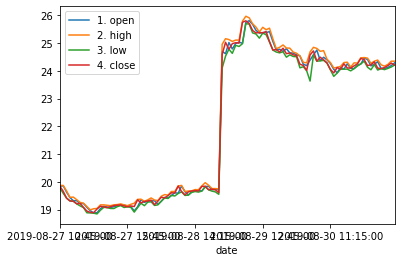

In [9]:
ntnx.plot()

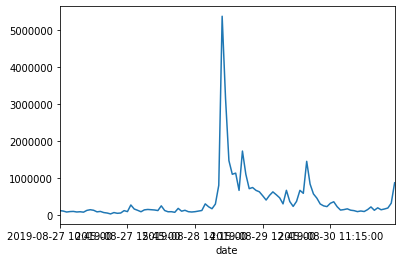

In [11]:
ntnx_vol.plot()

In [12]:
rsi, rsi_meta = ti.get_rsi('NTNX', interval='15min', time_period=7, series_type='close')

In [13]:
# rsi.index = pd.to_datetime(rsi.index)

In [14]:
rsi.head()

,RSI
date,
2019-07-22 11:30,30.6624
2019-07-22 11:45,45.2782
2019-07-22 12:00,50.5150
2019-07-22 12:15,49.4889
2019-07-22 12:30,46.9660


In [15]:
rsi = rsi[rsi.index >= '2019-08-27 10:45']

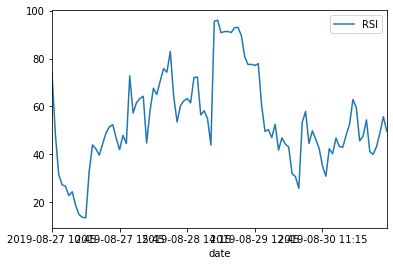

In [16]:
rsi.plot()

In [18]:
sma8, sma8_meta = ti.get_sma('NTNX', interval='15min', time_period=8, series_type='close')
sma13, sma13_meta = ti.get_sma('NTNX', interval='15min', time_period=13, series_type='close')

In [22]:
sma8 = sma8[sma8.index >= '2019-08-27 10:45']
sma13 = sma13[sma13.index >= '2019-08-27 10:45']

In [23]:
sma8.head()

,SMA
date,
2019-08-27 10:45,19.7310
2019-08-27 11:00,19.7509
2019-08-27 11:15,19.7402
2019-08-27 11:30,19.7019
2019-08-27 11:45,19.6293


In [24]:
sma13.head()

,SMA
date,
2019-08-27 10:45,19.6065
2019-08-27 11:00,19.6334
2019-08-27 11:15,19.6368
2019-08-27 11:30,19.6301
2019-08-27 11:45,19.6201


In [25]:
smas = sma8.join(sma13, lsuffix='_8', rsuffix='_13')

In [27]:
type(smas.index)

pandas.core.indexes.base.Index

In [26]:
# smas.index = pd.to_datetime(smas.index)

In [28]:
smas.head()

,SMA_8,SMA_13
date,,
2019-08-27 10:45,19.7310,19.6065
2019-08-27 11:00,19.7509,19.6334
2019-08-27 11:15,19.7402,19.6368
2019-08-27 11:30,19.7019,19.6301
2019-08-27 11:45,19.6293,19.6201


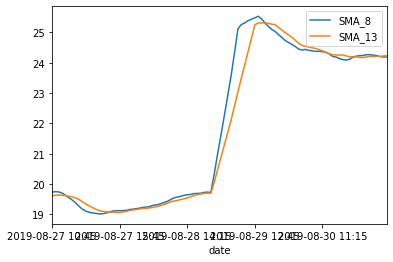

In [29]:
smas.plot()

In [38]:
# Remove last 3 characters from index string
ntnx.index = ntnx.index.map(lambda x: x[:-3])

In [40]:
full = ntnx.join(smas).join(rsi)

In [41]:
full.head()

,1. open,2. high,3. low,4. close,SMA_8,SMA_13,RSI
date,,,,,,,
2019-08-27 10:45,19.8356,19.87,19.78,19.8456,19.7310,19.6065,74.1257
2019-08-27 11:00,19.8600,19.87,19.59,19.6600,19.7509,19.6334,48.7184
2019-08-27 11:15,19.6300,19.67,19.41,19.4100,19.7402,19.6368,31.6632
2019-08-27 11:30,19.4307,19.44,19.31,19.3132,19.7019,19.6301,27.3397
2019-08-27 11:45,19.3200,19.45,19.30,19.3000,19.6293,19.6201,26.7584
